In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [25]:
data=pd.read_csv("./FuelConsumption (1).csv")
data

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [26]:
data.head(10)

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
5,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,10.6,219
6,2000,ACURA,INTEGRA GSR/TYPE R,SUBCOMPACT,1.8,4,M5,Z,10.8,223
7,2000,ACURA,NSX,SUBCOMPACT,3.0,6,AS4,Z,15.2,306
8,2000,ACURA,NSX,SUBCOMPACT,3.2,6,M6,Z,15.4,306
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,12.9,251


In [27]:
data.shape

(639, 10)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [29]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [30]:
data.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [31]:
data.columns
imp_col = data[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
imp_col.head()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


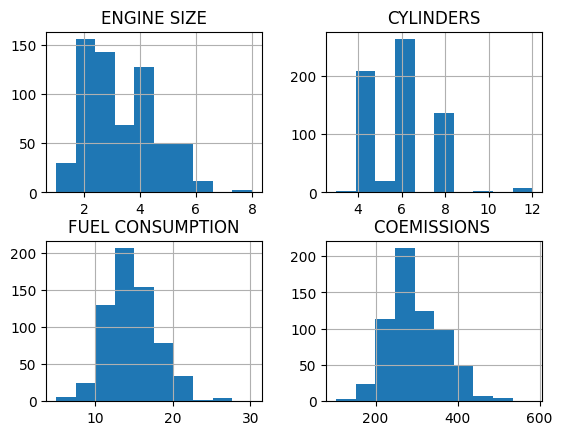

In [32]:
vis=imp_col[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
vis.hist()
plt.show()

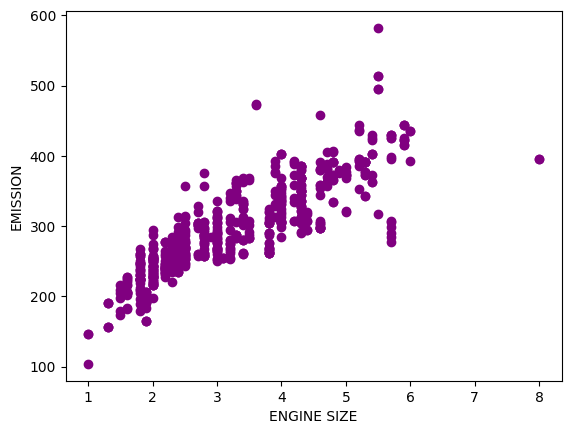

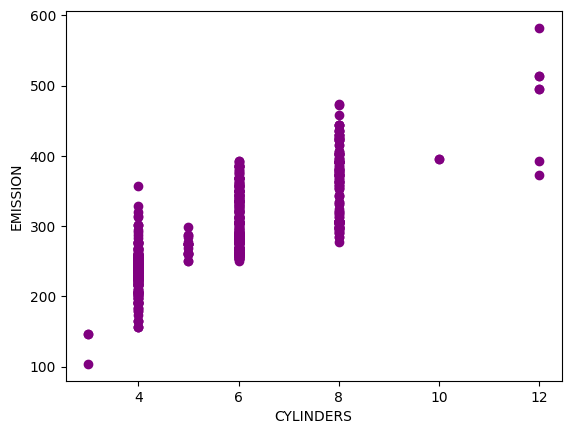

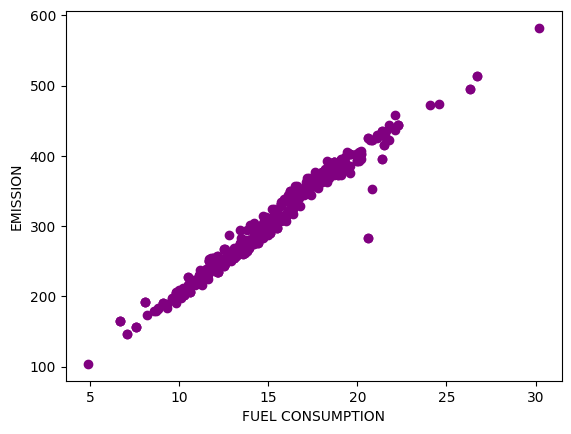

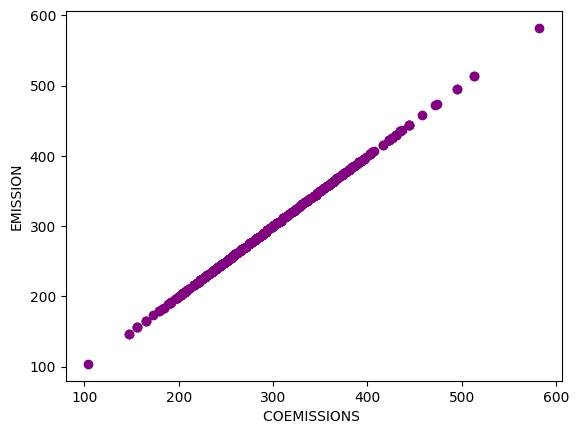

In [48]:
for i in imp_col[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]:
    plt.scatter(imp_col[i],imp_col['COEMISSIONS '],color = 'purple')
    plt.xlabel(i)
    plt.ylabel("EMISSION")
    plt.show()

In [35]:
train, test = train_test_split(imp_col, test_size=0.2, random_state=42)

In [36]:
coefficient=[]
intercept=[]
regress_model = {}
for i in ['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']:
    reg = linear_model.LinearRegression()
    train_x = np.asanyarray(train[[i]])
    train_y = np.asanyarray(train[['COEMISSIONS ']])
    reg.fit(train_x, train_y)
    regress_model[i] = reg
    print("Relation between {} & {}".format(i, "'COEMISSION'"))
    print("Coefficient :", reg.coef_)
    print("Intercept :", reg.intercept_)
    coefficient.append(reg.coef_)
    intercept.append(reg.intercept_)
    print('\n')

Relation between ENGINE SIZE & 'COEMISSION'
Coefficient : [[45.30016431]]
Intercept : [147.95137136]


Relation between CYLINDERS & 'COEMISSION'
Coefficient : [[32.86827926]]
Intercept : [105.00863971]


Relation between FUEL CONSUMPTION & 'COEMISSION'
Coefficient : [[19.572552]]
Intercept : [8.77548259]




(511,)
(511,)


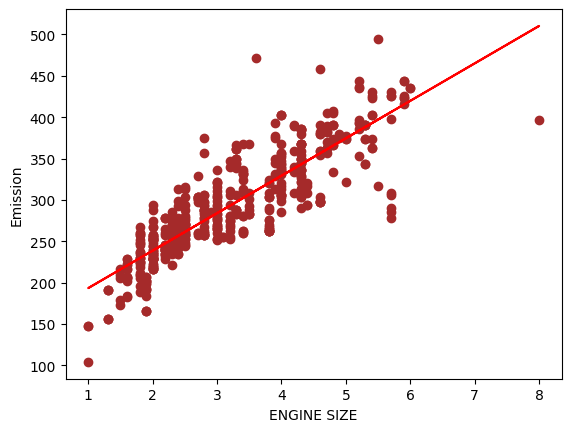

(511,)
(511,)


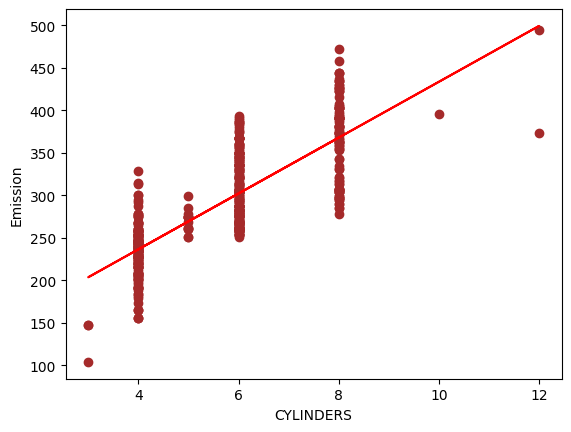

(511,)
(511,)


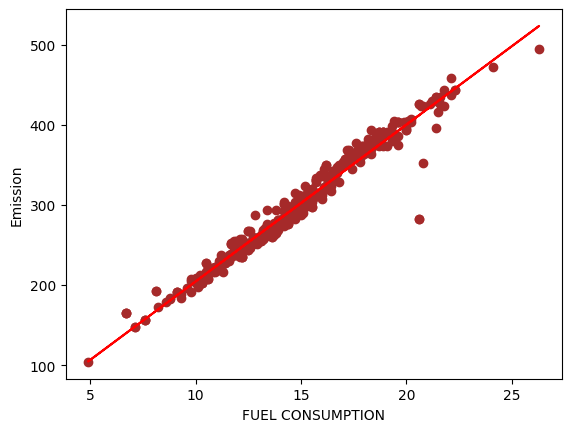

In [49]:
#Use regression parameter to model linear equation
j=0
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]:
    plt.scatter(train[i], train['COEMISSIONS '],  color='brown')
    x=train[i].values
    print(x.shape)
    y=coefficient[j][0]*x + intercept[j]
    print(y.shape)
    l=len(y)
    y=np.reshape(y,(l,))
    plt.plot(x, y, '-r')
    plt.xlabel(i)
    plt.ylabel("Emission")
    plt.show()
    j=j+1

In [39]:
from sklearn.metrics import r2_score
for i in train[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]:
    test_x = np.asanyarray(test[[i]])
    test_y = np.asanyarray(test[['COEMISSIONS ']])
    test_y_ = regress_model[i].predict(test_x)
    print("Fitting Error between {} & {}".format(i,"'CO2EMISSIONS'"))
    print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
    print('\n')

Fitting Error between ENGINE SIZE & 'CO2EMISSIONS'
Mean absolute error: 28.00
Residual sum of squares (MSE): 1720.37
R2-score: 0.53


Fitting Error between CYLINDERS & 'CO2EMISSIONS'
Mean absolute error: 33.65
Residual sum of squares (MSE): 1825.88
R2-score: 0.56


Fitting Error between FUEL CONSUMPTION & 'CO2EMISSIONS'
Mean absolute error: 7.77
Residual sum of squares (MSE): 98.84
R2-score: 0.98




In [52]:
cylinders = float(input("Enter number of cylinders: "))
fuel_consumption = float(input("Enter fuel consumption (L/100km): "))
emission_by_Cylinders = regress_model['CYLINDERS'].predict([[cylinders]])
emission_by_Fuel = regress_model['FUEL CONSUMPTION'].predict([[fuel_consumption]])
print(f"Predicted CO₂ Emission based on Cylinders: {emission_by_Cylinders[0][0]:.2f} g/km")
print(f"Predicted CO₂ Emission based on Fuel Consumption: {emission_by_Fuel[0][0]:.2f} g/km")

Enter number of cylinders:  6
Enter fuel consumption (L/100km):  5


Predicted CO₂ Emission based on Cylinders: 302.22 g/km
Predicted CO₂ Emission based on Fuel Consumption: 106.64 g/km
